# seaborn (subplot/subplots) 

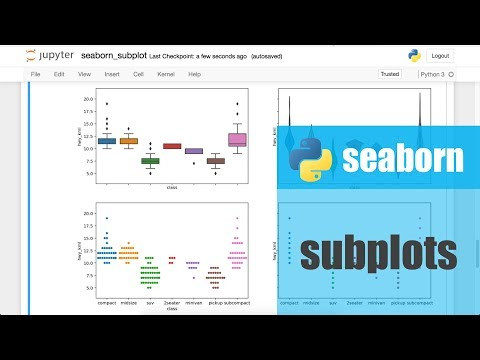

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('9wS4EQtGdow', width=720, height=405)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import json
from pandas.io.json import json_normalize
import requests
from PIL import Image
import io
import random

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read mpg.csv

In [5]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## convert miles per gallon to kilometers per litre 

In [6]:
df['cty_kml'] = (df.cty * 0.425144).round(0)
df['hwy_kml'] = (df.hwy * 0.425144).round(0)

In [7]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_kml,hwy_kml
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,8.0,12.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,9.0,12.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,9.0,13.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9.0,13.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,7.0,11.0


## create 'gear' column from trans

In [8]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_kml,hwy_kml,gear
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,8.0,12.0,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,9.0,12.0,manual
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,9.0,13.0,manual
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9.0,13.0,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,7.0,11.0,auto


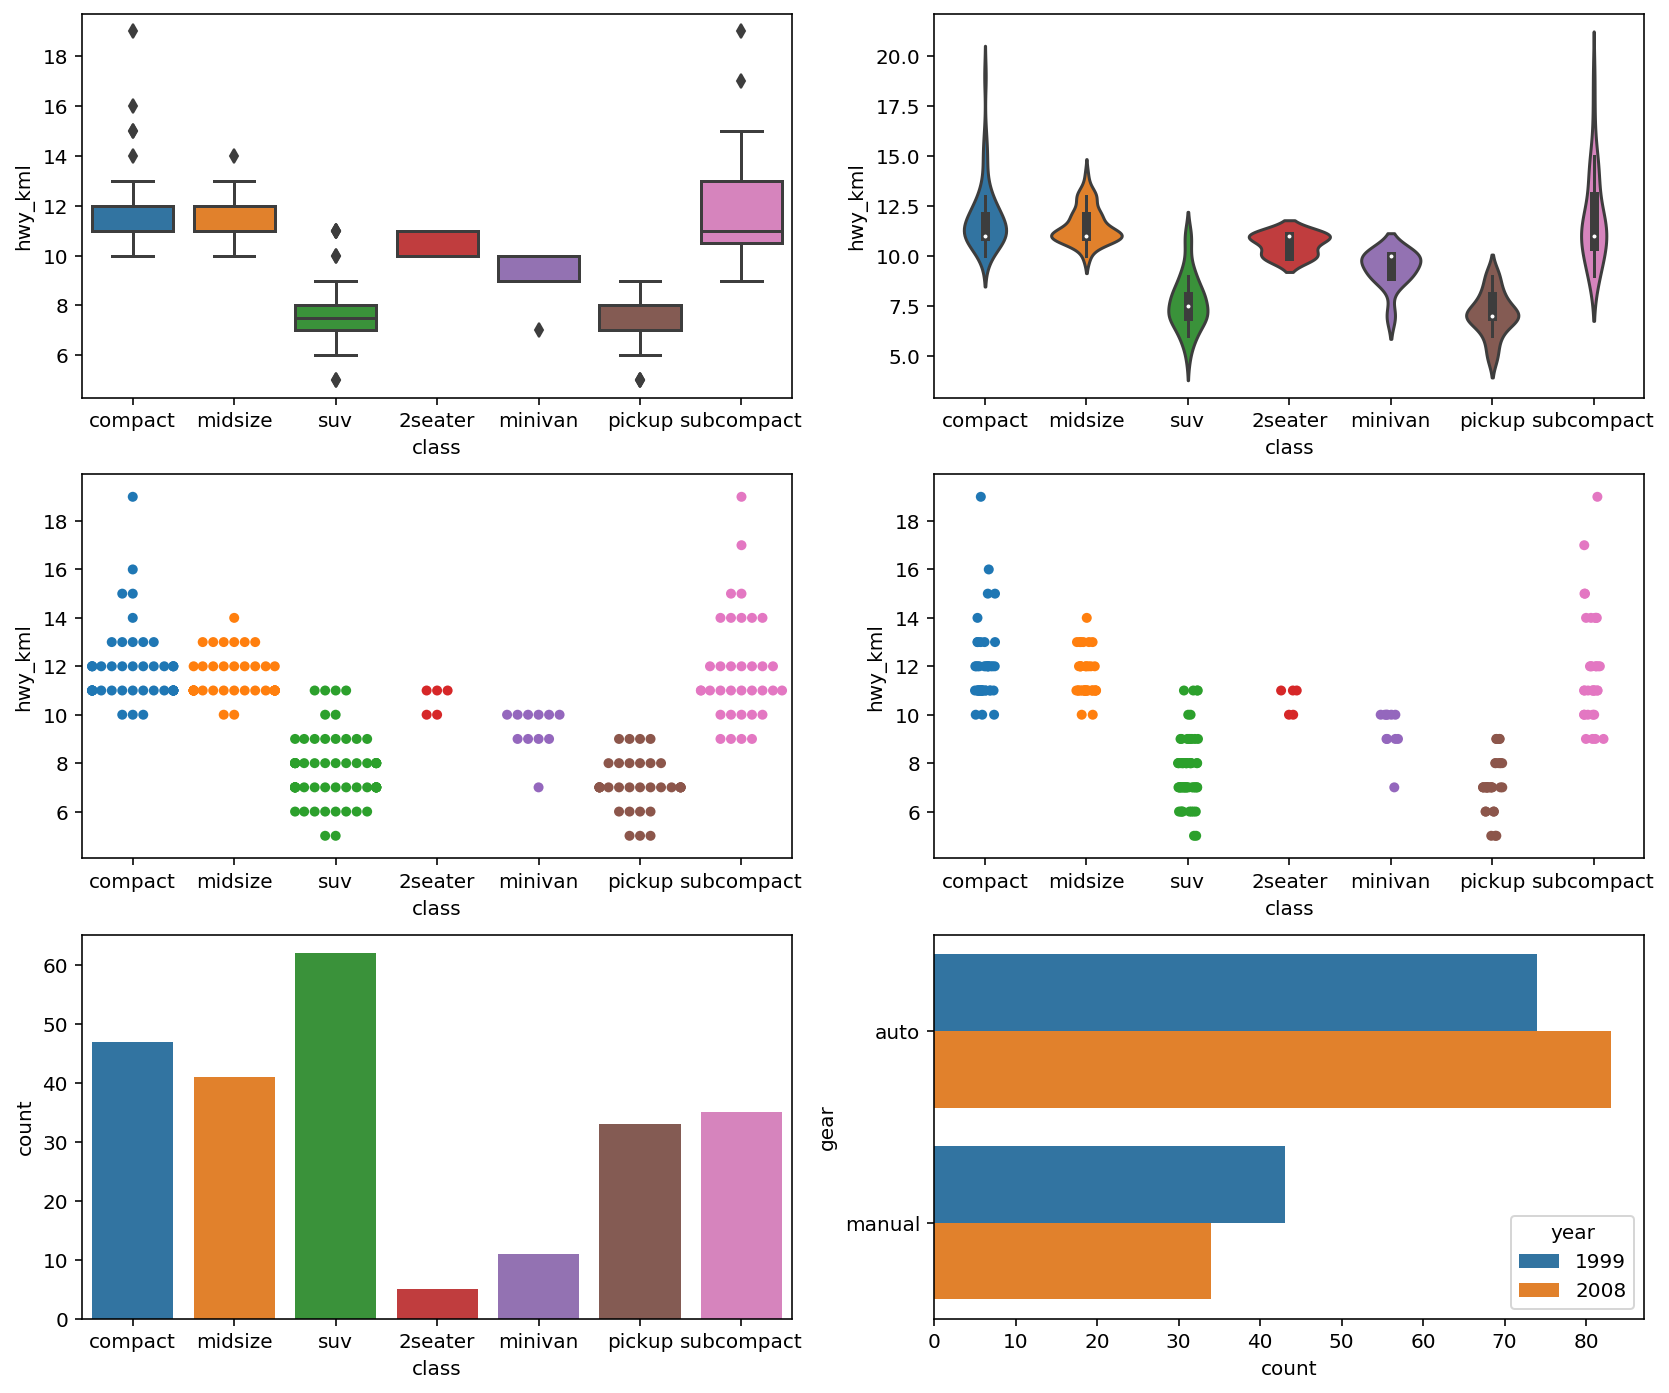

In [9]:
x_col="class"
y_col="hwy_kml"

fig = plt.figure(figsize=(14,12))
fig.add_subplot(321)
sns.boxplot(x=x_col, y=y_col, data=df)
fig.add_subplot(322)
sns.violinplot(x=x_col, y=y_col, data=df)
fig.add_subplot(323)
sns.swarmplot(x=x_col, y=y_col, data=df)
fig.add_subplot(324)
sns.stripplot(x=x_col, y=y_col, data=df)
fig.add_subplot(325)
sns.countplot(x="class", data=df)
fig.add_subplot(326)
sns.countplot(y="gear", hue="year", data=df)

(2, 2)


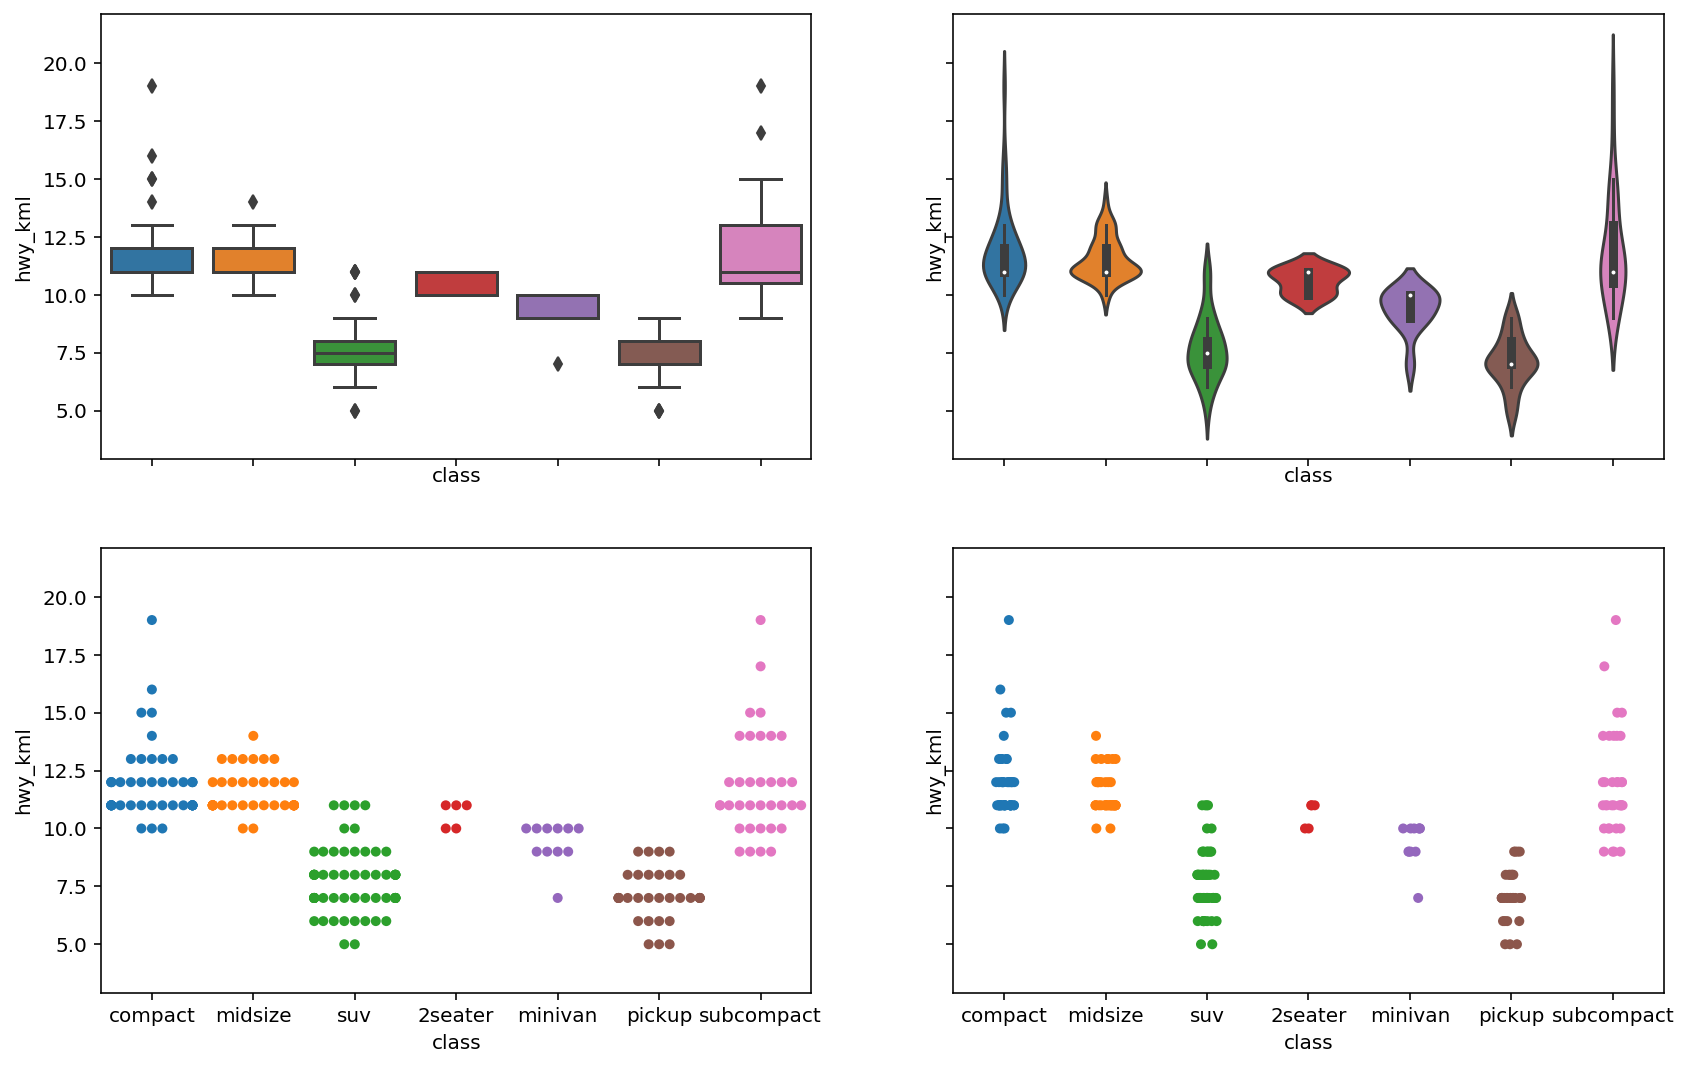

In [10]:
# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14,9))
fig, ax = plt.subplots(2, 2, figsize=(14,9), sharey=True, sharex=True)
print(ax.shape)
x_col="class"
y_col="hwy_kml"
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0,0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[0,1])
sns.swarmplot(x=x_col, y=y_col, data=df, ax=ax[1,0])
sns.stripplot(x=x_col, y=y_col, data=df, ax=ax[1,1])
# sns.kdeplot(df[y_col], ax=ax[1,0])
# sns.distplot(df[y_col], ax=ax[1,1])

(3, 2)


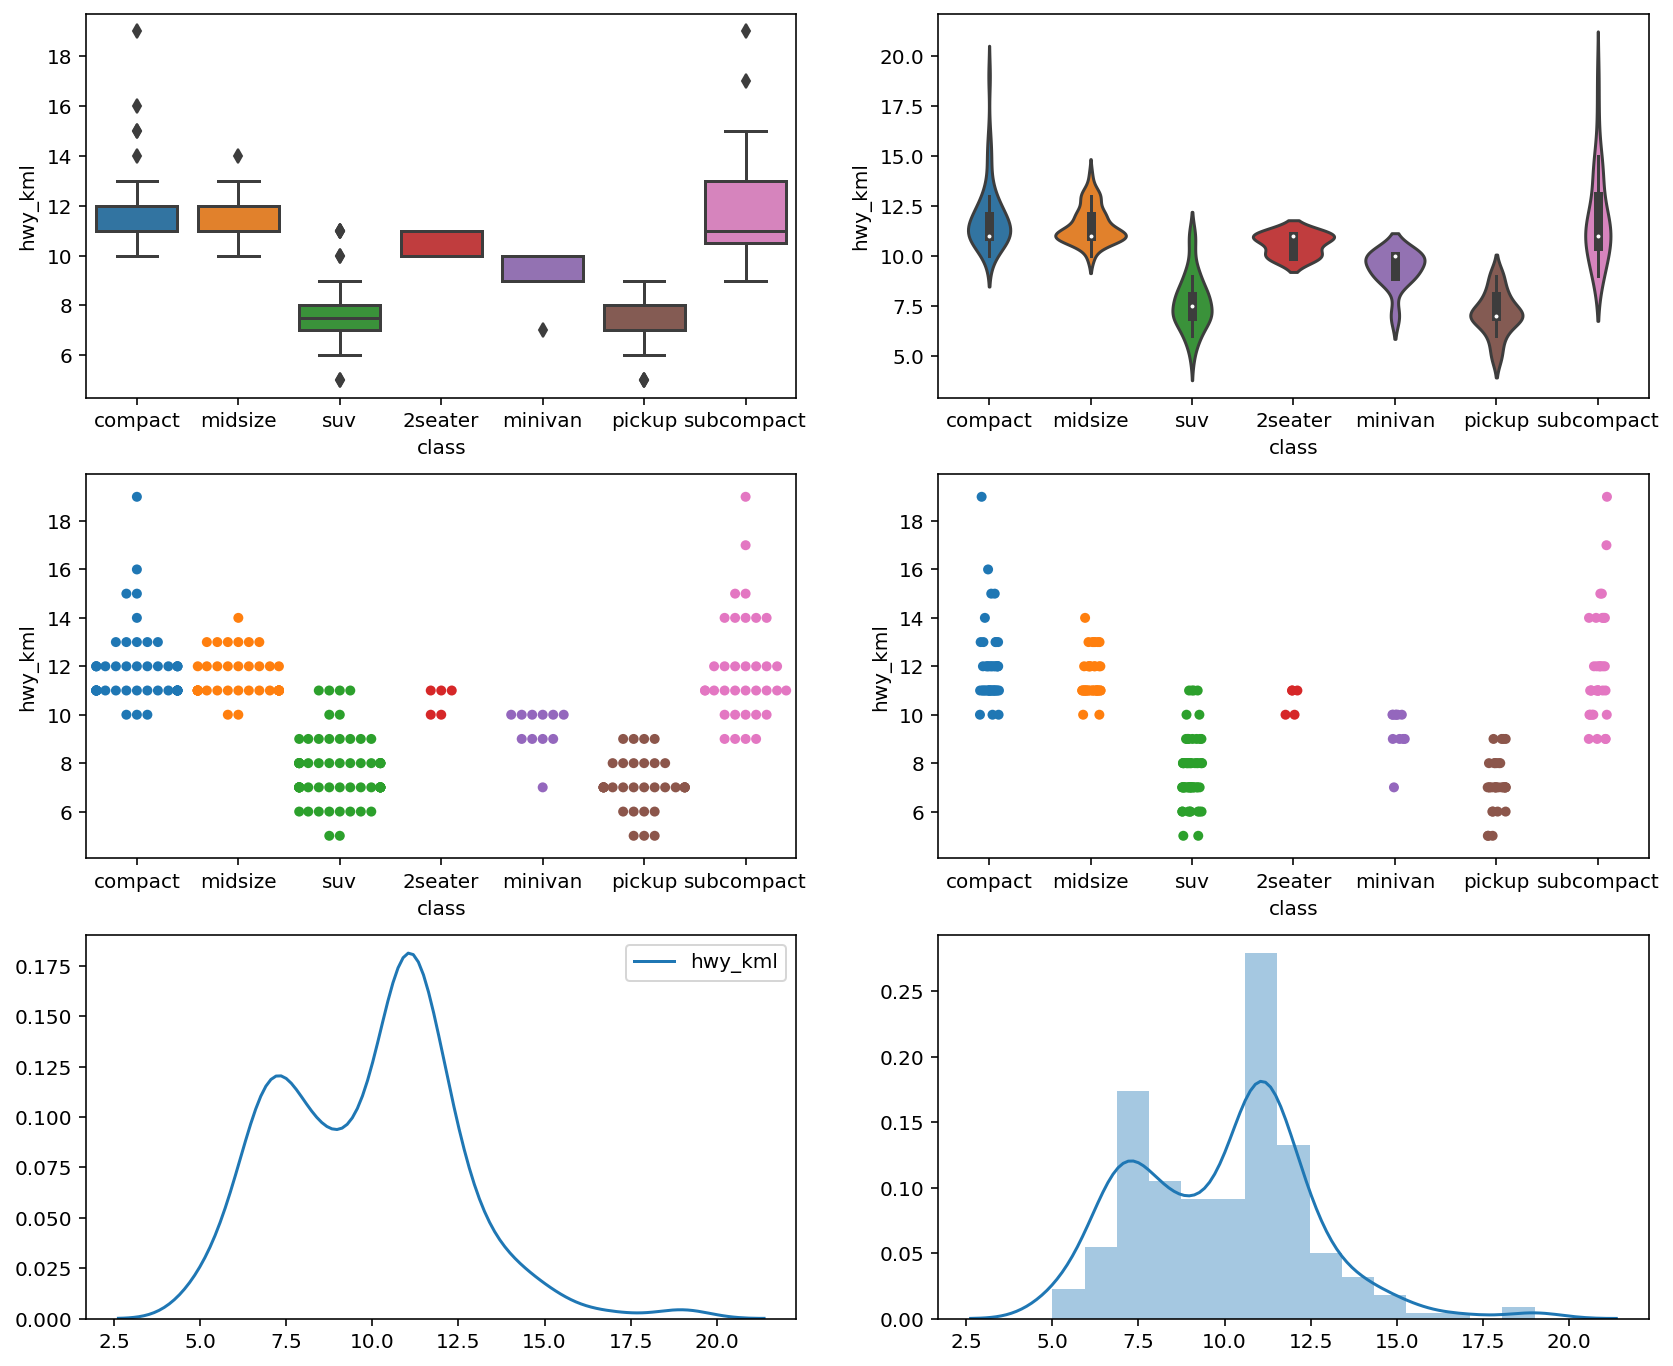

In [11]:
# fig, ax = plt.subplots(2, 2, figsize=(14,9), sharey=True, sharex=True)
fig, ax = plt.subplots(3, 2, figsize=(14,12))

print(ax.shape)
x_col="class"
y_col="hwy_kml"
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0,0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[0,1])
sns.swarmplot(x=x_col, y=y_col, data=df, ax=ax[1,0])
sns.stripplot(x=x_col, y=y_col, data=df, ax=ax[1,1])
sns.kdeplot(df[y_col], ax=ax[2,0])
sns.distplot(df[y_col], ax=ax[2,1])
plt.xlabel("");